Bestand: meting24.csv - Nagalmtijd (RT60 geschat vanuit RT20): 2.1653790673993885


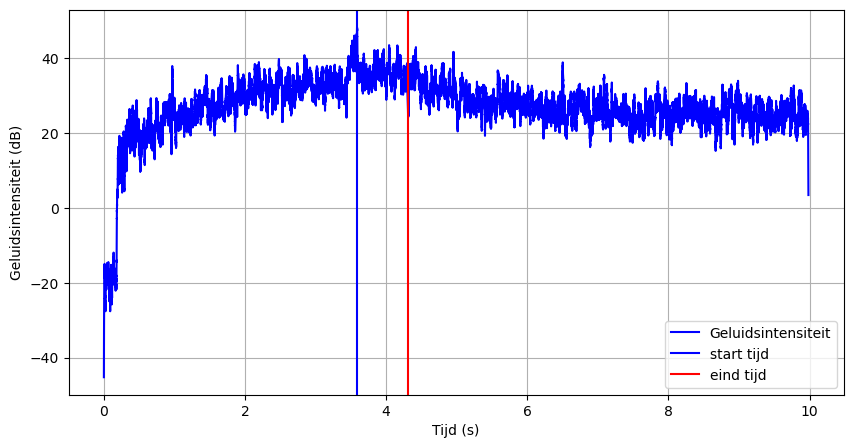

4.30917078418497


In [128]:
import pandas as pd
import numpy as np
import openpyxl as xl
import matplotlib.pyplot as plt


# kies de daling
dB_daling = 

#kies de meting
M = 
 
def bereken_nagalmtijd(csv_bestanden, dB_daling=60):
    resultaten = {}
 
    for csv_bestand in csv_bestanden:
        try:
            # Inladen van CSV-bestand
            df = pd.read_csv(f"C:/Users/Jespe/OneDrive/Documenten/school/TN jaar 1/project blok 3/csv bestanden/meting{M}.csv")
 
            # Veronderstellen dat de kolomnamen correct zijn
            tijd = df['Tijd (s)'].values
            geluidssterkte = df['Geluidsintensiteit (dB)'].values
 
            # Negatieve waarden verwijderen
            geldige_index = np.where(geluidssterkte >= 0)[0]
            if len(geldige_index) == 0:
                raise ValueError("Geen positieve geluidssterkte waarden gevonden.")
 
            tijd = tijd[geldige_index]
            geluidssterkte = geluidssterkte[geldige_index]
 
            # Maximaal geluidsniveau en bijbehorende tijd bepalen
            max_index = np.argmax(geluidssterkte)
            start_tijd = tijd[max_index]
 
            # Zorg dat we alleen de meetpunten na de maximale geluidssterkte beschouwen
            indices_na_max = np.where(tijd >= start_tijd)[0]
            tijd_na_max = tijd[indices_na_max]
            geluidssterkte_na_max = geluidssterkte[indices_na_max]
 
            # Maximaal geluidsniveau
            max_db = geluidssterkte[max_index]
 
            # Controleer de dB-daling en pas de doelwaarde en correctiefactor toe
            if dB_daling == 40:
                doel_db = max_db - 40
                factor = 1.5  # Geen correctie nodig
            elif dB_daling == 30:
                doel_db = max_db - 30
                factor = 2  # RT30 wordt omgerekend naar RT60
            elif dB_daling == 25:
                doel_db = max_db - 25
                factor = 2.4 # RT10 wordt omgerekend naar RT60
            elif dB_daling == 20:
                doel_db = max_db - 20
                factor = 3  # RT20 wordt omgerekend naar RT60
            elif dB_daling == 15:
                doel_db = max_db - 15
                factor = 4  # RT10 wordt omgerekend naar RT60
            elif dB_daling == 10:
                doel_db = max_db - 10
                factor = 6  # RT10 wordt omgerekend naar RT60
            else:
                raise ValueError("Ongeldige dB-daling. Kies 60, 30, 20 of 10.")
 
            # Zoek naar het eerste meetpunt na de maximale waarde waar de geluidssterkte <= doel_db is
            indices_doel = np.where(geluidssterkte_na_max <= doel_db)[0]
            if len(indices_doel) == 0:
                raise ValueError(f"Geen meetpunt gevonden dat {dB_daling} dB lager is dan het maximum.")
 
            eind_tijd = tijd_na_max[indices_doel[0]]
 
            # Bereken de nagalmtijd (zorg dat het verschil positief is) en pas de factor toe
            nagalmtijd = (eind_tijd - start_tijd) * factor
 
            resultaten[csv_bestand] = nagalmtijd
        except Exception as e:
            resultaten[csv_bestand] = f"Fout bij verwerking: {e}"
 
    return resultaten
# Inladen van CSV-bestand
df = pd.read_csv(f"C:/Users/Jespe/OneDrive/Documenten/school/TN jaar 1/project blok 3/csv bestanden/meting{M}.csv")
 
# Veronderstellen dat de kolomnamen correct zijn
tijd = df['Tijd (s)'].values
geluidssterkte = df['Geluidsintensiteit (dB)'].values
 
# Negatieve waarden verwijderen
geldige_index = np.where(geluidssterkte >= 0)[0]
if len(geldige_index) == 0:
    raise ValueError("Geen positieve geluidssterkte waarden gevonden.")
 
tijd = tijd[geldige_index]
geluidssterkte = geluidssterkte[geldige_index]
 
# Maximaal geluidsniveau en bijbehorende tijd bepalen
max_index = np.argmax(geluidssterkte)
start_tijd = tijd[max_index]
 
# Zorg dat we alleen de meetpunten na de maximale geluidssterkte beschouwen
indices_na_max = np.where(tijd >= start_tijd)[0]
tijd_na_max = tijd[indices_na_max]
geluidssterkte_na_max = geluidssterkte[indices_na_max]
 
# Maximaal geluidsniveau
max_db = geluidssterkte[max_index]
 
# Controleer de dB-daling en pas de doelwaarde en correctiefactor toe
if dB_daling == 40:
    doel_db = max_db - 40
    factor = 1.5  # Geen correctie nodig
elif dB_daling == 30:
    doel_db = max_db - 30
    factor = 2  # RT30 wordt omgerekend naar RT60
elif dB_daling == 25:
    doel_db = max_db - 25
    factor = 2.4 # RT10 wordt omgerekend naar RT60
elif dB_daling == 20:
    doel_db = max_db - 20
    factor = 3  # RT20 wordt omgerekend naar RT60
elif dB_daling == 15:
    doel_db = max_db - 15
    factor = 4  # RT10 wordt omgerekend naar RT60
elif dB_daling == 10:
    doel_db = max_db - 10
    factor = 6  # RT10 wordt omgerekend naar RT60
else:
    raise ValueError("Ongeldige dB-daling. Kies 60, 30, 20 of 10.")
 
# Zoek naar het eerste meetpunt na de maximale waarde waar de geluidssterkte <= doel_db is
indices_doel = np.where(geluidssterkte_na_max <= doel_db)[0]
if len(indices_doel) == 0:
    raise ValueError(f"Geen meetpunt gevonden dat {dB_daling} dB lager is dan het maximum.")
 
eind_tijd = tijd_na_max[indices_doel[0]]
 
 
 
# Voorbeeld van aanroep
csv_bestanden = [f"meting{M}.csv"]  # Pas dit aan naar de juiste bestandsnamen
  # Bijvoorbeeld, kies 60, 30, 20 of 10
resultaten = bereken_nagalmtijd(csv_bestanden, dB_daling)
 
for bestand, resultaat in resultaten.items():
    print(f"Bestand: {bestand} - Nagalmtijd (RT60 geschat vanuit RT{dB_daling}): {resultaat}")
 
df = pd.read_csv(f"C:/Users/Jespe/OneDrive/Documenten/school/TN jaar 1/project blok 3/csv bestanden/meting{M}.csv")
 
# Controleren of de kolommen correct zijn
if 'Tijd (s)' not in df.columns or 'Geluidsintensiteit (dB)' not in df.columns:
    raise ValueError("Het bestand bevat niet de juiste kolommen: 'Tijd (s)' en 'Geluidsintensiteit (dB)'.")
 
# Data ophalen
tijd = df['Tijd (s)']
geluidssterkte = df['Geluidsintensiteit (dB)']
 
# Grafiek maken
plt.figure(figsize=(10, 5))
plt.plot(tijd, geluidssterkte, label="Geluidsintensiteit", color="b", linestyle="-")
 
plt.axvline(x=start_tijd, color='blue', linestyle=None, label='start tijd')
plt.axvline(x=eind_tijd, color='red', linestyle=None, label='eind tijd')
# Labels en titel toevoegen
plt.xlabel("Tijd (s)")
plt.ylabel("Geluidsintensiteit (dB)")
plt.legend()
plt.grid(True)
 
# Grafiek tonen
plt.show()
 
print(eind_tijd)

In [ ]:
# hier de lijst met metingen
(4.04, 1.642, 1.13978, 0.9955, 0.852, 2.2014, 1.0344, 1.8399, 2.30776, 4.8825,
 3.0708, 3.03, 3.256, 2.258, 2.41488, 2.104, 0.638, 1.894, 1.7, 2.075,
2.967, 2.5742, 3.7, 2.1)